In [1]:
# Homework 7 Author: Heeirthan Shanthan Date: 26.11.23

In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from PIL import Image
from io import BytesIO as sio
import IPython.display as ipd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the figures
(x_tr, y_tr), (x_te, y_te) = mnist.load_data()

In [4]:
# the inputs are given in 2d arrays, and we need them to be 1d arrays
x_tr_2d = [x.reshape(-1,) for x in x_tr]
x_te_2d = [x.reshape(-1,) for x in x_te]

In [5]:
#Training neural network with two hidden layers,16 neurons per hidden layer
nn2 = MLPClassifier(hidden_layer_sizes = (16,16))
nn2.fit(x_tr_2d,y_tr)

C:\Users\heeir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16, 16))

In [6]:
nn2.score(x_te_2d,y_te)

0.9289

In [7]:
#Checking which activation function
nn2.activation

'relu'

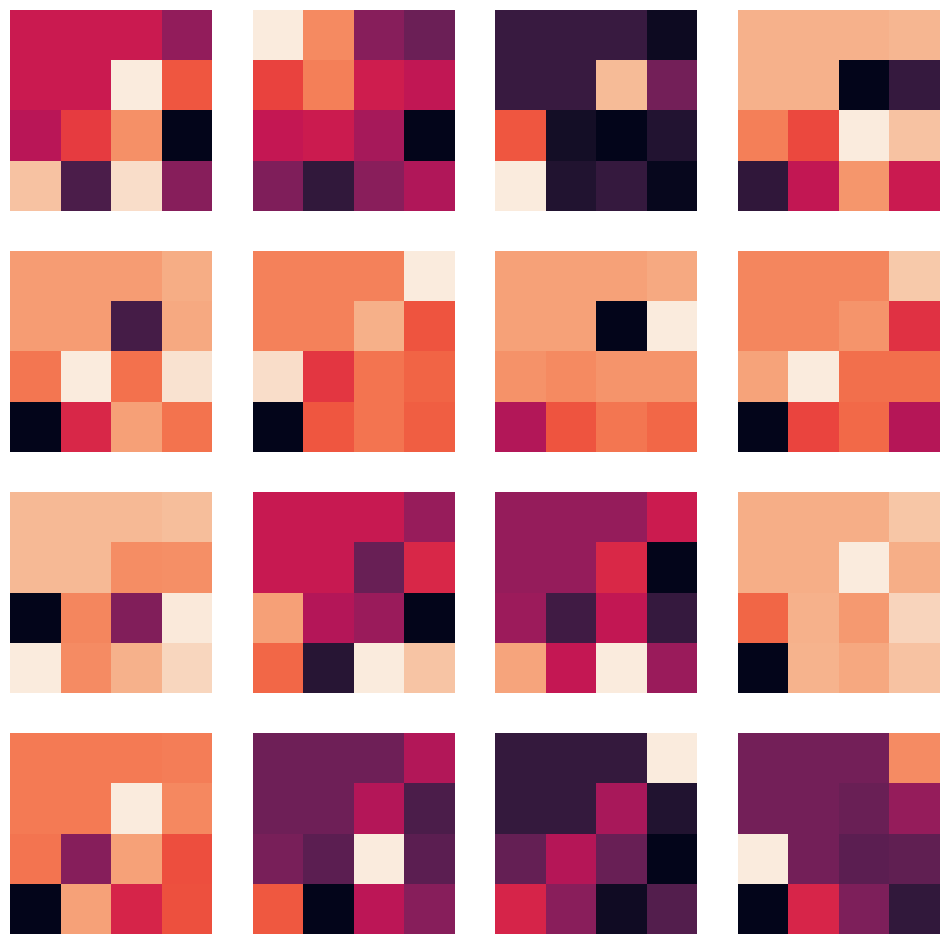

In [12]:
# Creating a heatmap grid
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Iterate over the indices of the neurons in the second layer
for idx in range(16):
    res = [] #reset list for each neuron
    for i in range(16): #iterate through input vector, to see neuron response to different input patterns
        inp = np.zeros(16) #create input vector filled with zeros
        inp[i] = 255 #active one element of the input vector
        second_hl_activation = np.matmul(inp, nn2.coefs_[1][:, idx]) #calculate the neuron activation, multiply input and weights from 1st layer
        res.append(second_hl_activation) # store activation in array
    sns.heatmap(pd.DataFrame(np.array(res).reshape(4,4)), ax=axes[idx // 4, idx % 4], cbar=False)
    

# Removing ticks and plotting
plt.setp(axes, xticks=[], yticks=[])
plt.show()



In [13]:
# Hard to see much here, but the lighter the pixel, the more significant the pixel is(higher activation function output) 
# Similarly, the darker the pixel, the less significant the pixel is(lower activation function output) 